In [ ]:
# import library
import pandas as pd               # For data handling
import matplotlib.pylab as plt    # For plotting
from sklearn.model_selection import train_test_split  # For train-test split
from xgboost import XGBRegressor  # XGBoost regression model
from sklearn.metrics import mean_squared_error, r2_score  # Model evaluation metrics


In [ ]:
df=pd.read_csv("Walmart.csv") # Load dataset from CSV file
df                             # Display dataframe

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
d = pd.to_datetime(df['Date']) # Convert Date column to datetime
df['year'] = d.dt.year         # Extract year
df['month'] = d.dt.month       # Extract month
df['week'] = d.dt.isocalendar().week.astype(int) # Extract ISO week number
df['day_of_week'] = d.dt.dayofweek               # Extract day of week (0=Mon)
df = df.drop(columns=['Date'])                   # Drop original Date column


In [ ]:
df["IsHoliday"]=df["IsHoliday"].astype(int) # Convert IsHoliday column to integer (0 or 1)

In [ ]:
X=df.drop("Weekly_Sales",axis=1) # Features (all columns except Weekly_Sales)
y=df["Weekly_Sales"]             # Target variable (Weekly_Sales)               


In [ ]:
df.head() # Show first 5 rows of dataframe

,Store,Dept,Weekly_Sales,IsHoliday,year,month,week,day_of_week
0,1,1,24924.50,0,2010,2,5,4
1,1,1,46039.49,1,2010,2,6,4
2,1,1,41595.55,0,2010,2,7,4
3,1,1,19403.54,0,2010,2,8,4
4,1,1,21827.90,0,2010,3,9,4


In [ ]:
df.info()# Display dataframe summary (columns, non-null count, data types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  int64  
 4   year          421570 non-null  int32  
 5   month         421570 non-null  int32  
 6   week          421570 non-null  int64  
 7   day_of_week   421570 non-null  int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 20.9 MB


In [ ]:
# Split data into 80% train and 20% test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
xgr=XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6) # Initialize XGBoost model
xgr.fit(X_train,y_train) # Train the model



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [143]:
y_pred=xgr.predict(X_test)

In [152]:
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(r2)
print(mse)


0.9135590042709927
45076471.86814762


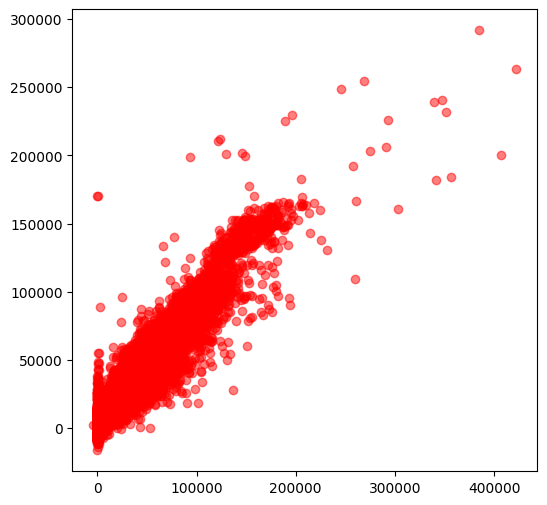

In [146]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color="red", alpha=0.5)  # scatter plot